# Laboratorio: Análisis de Regresión

### Antes de empezar:

- Lee el archivo README.md
- Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1

Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
| --------- | ---- | -------- |
| 1         | 17   | 10       |
| 2         | 51   | 1        |
| 3         | 27   | 5        |
| 4         | 21   | 9        |
| 5         | 36   | 4        |
| 6         | 48   | 2        |
| 7         | 19   | 9        |
| 8         | 26   | 6        |
| 9         | 54   | 0        |
| 10        | 30   | 3        |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Aleja\AppData\Local\Temp\ipykernel_26528\3260326528.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.

```
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
```


In [2]:
# Your code here. 
s_id = range(1,11)
student_data = pd.DataFrame({'StudentId':s_id,'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
student_data

,StudentId,Edad,Retrasos
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.


<Axes: xlabel='Edad', ylabel='Retrasos'>

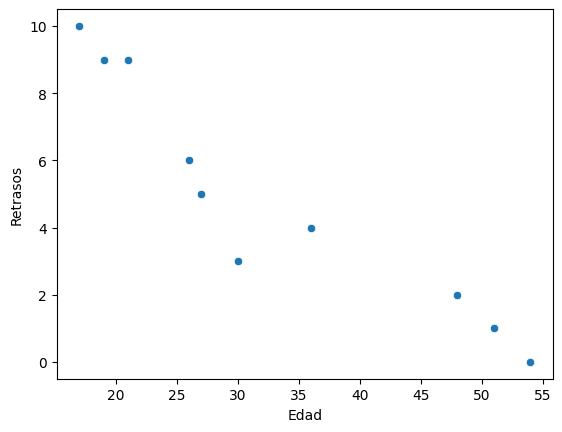

In [3]:
# Your code here
sns.scatterplot(data=student_data,x='Edad',y='Retrasos')

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?


_tu explicación aquí_
Si, se puede observar que hay cierta tendencia de que mientras mas jovenes son los estudiantes es mas habitual llegar con retraso a clases


Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.


In [5]:
# your code here
covarianza = np.cov(student_data['Edad'],student_data['Retrasos'])[0,1]
correlacion = np.corrcoef(student_data['Edad'],student_data['Retrasos'])[0,1]
print(covarianza)
print(correlacion)

-45.56666666666666
-0.9391626886887122


Ambos términos miden la relación y la dependencia entre dos variables. Sin embargo, la **_"Covarianza"_** indica la dirección de la relación lineal entre variables. La **_"Correlación"_**, por otro lado, mide tanto la fuerza como la dirección de la relación lineal entre dos variables. La correlación es una función de la covarianza.

VALORES DE CORRELACIÓN ==> estandarizados

VALORES DE COVARIANZA ==> NO estandarizados

Por lo tanto, a partir de la covarianza podemos obtener la dirección de la relación entre las dos variables en el ejemplo, en este caso negativa (es decir, a medida que una aumenta, la otra disminuye). Por otro lado, a partir de la correlación también podemos obtener la fuerza de la relación entre las dos variables. Este valor oscilará entre -1 y 1.
Cuanto más cerca de 1 o -1, mayor correlación. En nuestro caso tenemos una correlación de -0.939 que indica una gran correlación entre estas dos variables.


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.


In [6]:
# your explanation here
lr = LinearRegression()

Xs = student_data['Edad'].values.reshape(-1,1)
ys = student_data['Retrasos']

lr.fit(Xs,ys)

# Coeficientes del modelo
print(f"Intercepto (b0): {lr.intercept_:.2f}")
print(f"Pendiente (b1): {lr.coef_[0]:.2f}")

Intercepto (b0): 12.89
Pendiente (b1): -0.24


Grafica tu modelo de regresión en tu diagrama de dispersión.


[ 8.76085026  0.50494405  6.33264255  7.78956717  4.14725561  1.23340636
  8.27520872  6.57546332 -0.22351827  5.60418024]


NameError: name 'Xs2' is not defined

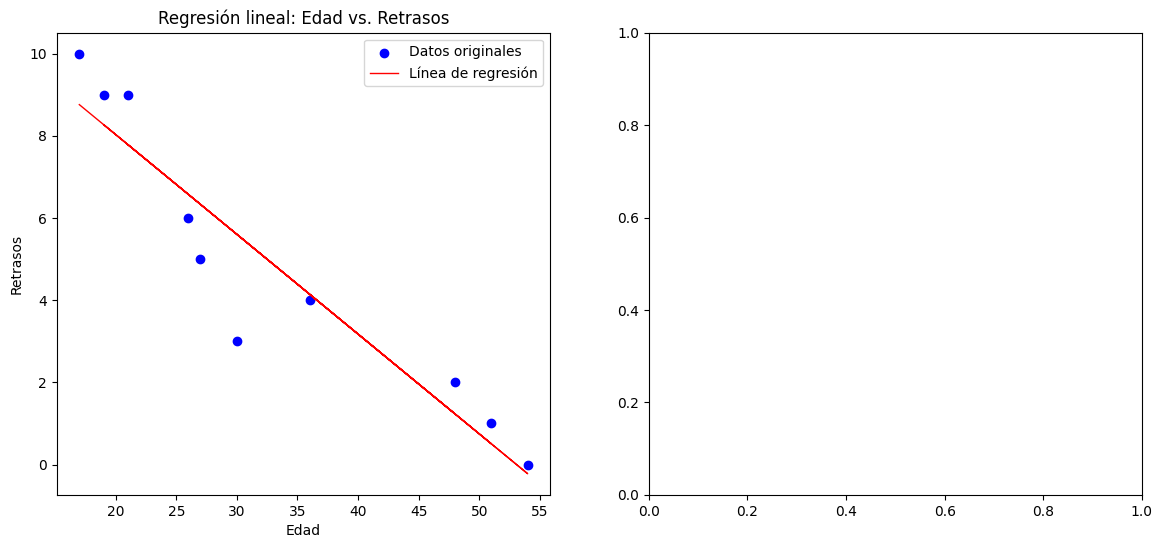

In [7]:
# Your code here.
y_pred = lr.predict(Xs)
print(y_pred)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

axes[0].scatter(Xs,ys, color='blue', label='Datos originales')
axes[0].plot(Xs,y_pred, color='red', linewidth=1, label='Línea de regresión')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Retrasos')
axes[0].set_title('Regresión lineal: Edad vs. Retrasos')
axes[0].legend()

# Your code here.
y_pred2 = lr.predict(Xs2)
print(y_pred2)

axes[1].scatter(Xs2,ys2,color='blue', label='Datos originales')
axes[1].plot(Xs2 ,y_pred2,color='red', linewidth=1, label='Línea de regresión')
axes[1].set_xlabel('Retrasos')
axes[1].set_ylabel('Edad')
axes[1].set_title('Regresión lineal: Retrasos vs. Edad')
axes[1].legend()

plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.


In [8]:
#Summary of our results:
resultados = smf.ols('Retrasos ~ Edad', data=student_data).fit() # Retrasos es la variable dependiente, Edad es la independiente
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:               Retrasos   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           5.57e-05
Time:                        19:01:40   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.0

c:\Users\Aleja\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [9]:
#Summary of our results:
resultados2 = smf.ols('Edad ~ Retrasos', data=student_data).fit() # Edad es la variable dependiente, Retrasos es la independiente
print(resultados2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Edad   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           5.57e-05
Time:                        19:01:44   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.0

c:\Users\Aleja\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


_tu explicación aquí_

* El valor de R-cuadrado es de 0.882, lo que indica que el modelo explica el 88.2% de la varianza en los datos.
* El valor de p es de 0.00, lo que indica que el modelo es estadísticamente significativo.
* El intercepto es de 12.8888, lo que significa que el número promedio de retrasos esperado para un estudiante de 0 años de edad es de 12.8888.
* El coeficiente para la edad es de -0.2428, lo que significa que por cada año adicional de edad, el número de retrasos esperados disminuye en 0.2428.


**En resumen**, los resultados del modelo sugieren que la edad es un predictor significativo de los retrasos en este conjunto de datos. Cuanto mayor es la edad del estudiante, menor es el número esperado de retrasos.


## Desafío 2

Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.


In [12]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
print(vehicles.info())
vehicles.head(10)
seed = 1 # para mantener la salida de este notebook estable en diferentes ejecuciones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.


In [13]:
# Your code here.
vehicles_no_object = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','CO2 Emission Grams/Mile','Fuel Cost/Year']]

# 1ra forma de Vizualizar la correlación de una columna
correlation_co2_1= vehicles_no_object.corr().loc[['CO2 Emission Grams/Mile'], ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

print(correlation_co2_1)

#  2d forma de Vizualizar la correlación de una columna
correlation_co2_2= vehicles_no_object.corr()['CO2 Emission Grams/Mile']
print(correlation_co2_2)


                           Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
CO2 Emission Grams/Mile -0.2223   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  
CO2 Emission Grams/Mile        0.930865  
Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64


Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.


In [60]:
# Your code here. opcion A Regresion lineal

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

X = vehicles_no_object.drop('CO2 Emission Grams/Mile',axis=1)
y = vehicles_no_object['CO2 Emission Grams/Mile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

features = [['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
target = ['CO2 Emission Grams/Mile']

print('Tamaños de entrenamiento y prueba de X: {} {}'.format(X_train.shape, X_test.shape))
print('Tamaños de entrenamiento y prueba de y: {} {}'.format(y_train.shape, y_test.shape))

Tamaños de entrenamiento y prueba de X: (28761, 5) (7191, 5)
Tamaños de entrenamiento y prueba de y: (28761,) (7191,)


In [61]:
# Ajustando un modelo de regresión lineal múltiple
lin_reg = LinearRegression()  # Crear el estimador de Regresión Lineal
lin_reg.fit(X_train, y_train)  # Realizar el ajuste

# Coeficientes de la regresión
coefs = pd.Series(lin_reg.coef_, index=X_train.columns).sort_values()

# Predicción
y_pred = lin_reg.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2score_train = lin_reg.score(X_train, y_train)
r2score_test = lin_reg.score(X_test, y_test)

# Los coeficientes
# Intercepto y coeficientes
print('\nIntercepto y coeficientes:\n{} {}'.format(lr.intercept_, lr.coef_))
# Error cuadrático medio
print('\nError Cuadrático Medio (ECM): {}'.format(mse))
# Coeficiente de determinación: 1 es una predicción perfecta
print('Puntaje R^2 (entrenamiento): {}'.format(r2score_train))
print('Puntaje R^2 (prueba): {}'.format(r2score_test))

print(coefs)


Intercepto y coeficientes:
12.888803363135771 [-0.24282077]

Error Cuadrático Medio (ECM): 234.5451751831985
Puntaje R^2 (entrenamiento): 0.9802394415868356
Puntaje R^2 (prueba): 0.9833841512667476
Combined MPG         -3.091358
Year                 -0.325834
Fuel Cost/Year        0.033677
Cylinders             1.868818
Fuel Barrels/Year    18.840868
dtype: float64


In [62]:
for i,feat in enumerate(X_train.columns):
    print(f"\nCaracterística: {feat}")
    print(f"Máximo: {X_train[feat].max()}, Mínimo: {X_train[feat].min()}")
    print(f"Media: {X_train[feat].mean()}, Varianza: {X_train[feat].var()}")


Característica: Year
Máximo: 2017, Mínimo: 1984
Media: 2000.6824867007406, Varianza: 101.65384104837145

Característica: Cylinders
Máximo: 16.0, Mínimo: 2.0
Media: 5.761134870136643, Varianza: 3.0707578775326403

Característica: Fuel Barrels/Year
Máximo: 47.08714285714285, Mínimo: 0.06
Media: 17.597822397260288, Varianza: 19.981776482589254

Característica: Combined MPG
Máximo: 56, Mínimo: 7
Media: 19.94416049511491, Varianza: 26.230539699414273

Característica: Fuel Cost/Year
Máximo: 5800, Mínimo: 600
Media: 1891.3041966551928, Varianza: 257332.76006896605


In [63]:
# División en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler

# Ajustar el StandardScaler y transformar los datos de entrenamiento
scalerX = StandardScaler().fit(X_train)
X_train_norm = scalerX.transform(X_train)
X_test_norm = scalerX.transform(X_test)

for i, feat in enumerate(X_train.columns):
    print()
    print(feat)
    print("\nAntes de la transformación:")
    print(f'Entrenamiento: Máximo: {X_train[feat].max()}, Mínimo: {X_train[feat].min()}, Media: {X_train[feat].mean()}, Varianza: {X_train[feat].var()}')
    print(f'Prueba: Máximo: {X_test[feat].max()}, Mínimo: {X_test[feat].min()}, Media: {X_test[feat].mean()}, Varianza: {X_test[feat].var()}')

    print("\nDespués de la transformación:")
    print('Entrenamiento: Máximo {}, mínimo {}, media {} y varianza {}'.format(np.max(X_train_norm[:, i]), np.min(X_train_norm[:, i]), np.mean(X_train_norm[:, i]), np.var(X_train_norm[:, i])))
    print('Prueba: Máximo {}, mínimo {}, media {} y varianza {}'.format(np.max(X_test_norm[:, i]), np.min(X_test_norm[:, i]), np.mean(X_test_norm[:, i]), np.var(X_test_norm[:, i])))


Year

Antes de la transformación:
Entrenamiento: Máximo: 2017, Mínimo: 1984, Media: 2000.6824867007406, Varianza: 101.65384104837145
Prueba: Máximo: 2017, Mínimo: 1984, Media: 2000.8520372688083, Varianza: 101.94110815772072

Después de la transformación:
Entrenamiento: Máximo 1.6184512740897896, mínimo -1.6546511322301158, media 3.458710858677168e-16 y varianza 1.0
Prueba: Máximo 1.6184512740897896, mínimo -1.6546511322301158, media 0.01681685976773125 y varianza 1.002721342852062

Cylinders

Antes de la transformación:
Entrenamiento: Máximo: 16.0, Mínimo: 2.0, Media: 5.761134870136643, Varianza: 3.0707578775326403
Prueba: Máximo: 16.0, Mínimo: 2.0, Media: 5.780837157558059, Varianza: 3.1219192434369263

Después de la transformación:
Entrenamiento: Máximo 5.843009403154796, mínimo -2.1463654549608355, media 2.327218306338494e-16 y varianza 1.0000000000000004
Prueba: Máximo 5.843009403154796, mínimo -2.1463654549608355, media 0.011243497126573332 y varianza 1.0165547923352656

Fuel Ba

In [69]:
# Your code here.

# Entrenar modelos
lr_norm = LinearRegression()
# ridge_norm = linear_model.Ridge(alpha=.3)
# lasso_norm = linear_model.Lasso(alpha=.3)

lr_norm.fit(X_train_norm, y_train)
# ridge_norm.fit(X_train_norm, y_train)
# lasso_norm.fit(X_train_norm, y_train)

# Coeficientes de regresión
coefs_lr_norm = pd.Series(np.abs(lr_norm.coef_), X_train.columns).sort_values()
# coefs_ridge_norm = pd.Series(np.abs(ridge_norm.coef_), boston.feature_names).sort_values()
# coefs_lasso_norm = pd.Series(np.abs(lasso_norm.coef_), boston.feature_names).sort_values()

# Scores
print('lin_reg: {}'.format(lin_reg.score(X_test, y_test)))
# print('ridge: {}'.format(ridge.score(X_test, y_test)))
# print('lasso: {}'.format(lasso.score(X_test, y_test)))
print('lr_norm: {}'.format(lr_norm.score(X_test_norm, y_test)))

lin_reg: 0.9833841512667476
lr_norm: 0.9833841512667475


In [117]:
#Summary of our results:
import statsmodels.formula.api as smf

vehicles_no_object2 = vehicles_no_object.copy()

vehicles_no_object2.rename(columns={'CO2 Emission Grams/Mile': 'CO2_Emissions_Grams_Mile','Combined MPG':'Combined_MPG','Fuel Barrels/Year':'Fuel_Barrels_Year','Fuel Cost/Year':'Fuel_Cost_Year'}, inplace=True)
vehicles_no_object2


,Year,Cylinders,Fuel_Barrels_Year,Combined_MPG,CO2_Emissions_Grams_Mile,Fuel_Cost_Year
0,1984,4.0,19.388824,17,522.764706,1950
1,1984,6.0,25.354615,13,683.615385,2550
2,1985,4.0,20.600625,16,555.437500,2100
3,1985,6.0,25.354615,13,683.615385,2550
4,1987,6.0,20.600625,16,555.437500,2550
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,244.000000,1100
35948,2014,3.0,9.155833,36,243.000000,1100
35949,2015,3.0,9.155833,36,244.000000,1100
35950,2016,3.0,9.155833,36,246.000000,1100


In [118]:
#Summary of our results:
for feature in vehicles_no_object2.columns:
    if feature != 'CO2_Emissions_Grams_Mile':
        formula = f'CO2_Emissions_Grams_Mile ~ {feature}'
        results = smf.ols(formula, data=vehicles_no_object2).fit()
        print(f"\n\nRegression results for {feature}:")
        print(results.summary())



Regression results for Year:
                               OLS Regression Results                               
Dep. Variable:     CO2_Emissions_Grams_Mile   R-squared:                       0.049
Model:                                  OLS   Adj. R-squared:                  0.049
Method:                       Least Squares   F-statistic:                     1869.
Date:                      Sat, 13 Jul 2024   Prob (F-statistic):               0.00
Time:                              13:52:42   Log-Likelihood:            -2.2194e+05
No. Observations:                     35952   AIC:                         4.439e+05
Df Residuals:                         35950   BIC:                         4.439e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.


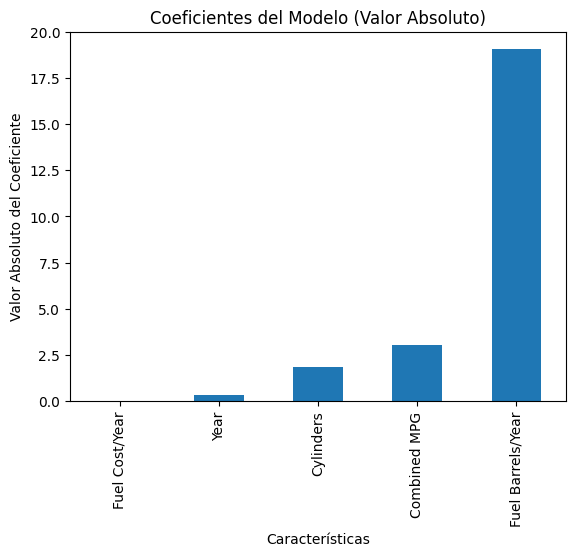

In [90]:
# Your code here.
np.abs(coefs).sort_values().plot(kind='bar', title='Coeficientes del Modelo (Valor Absoluto)')
plt.xlabel('Características')
plt.ylabel('Valor Absoluto del Coeficiente')
plt.show()

In [126]:
for i, feat in enumerate(features):
    print()
    print(feat)
    print("Máximo {}, mínimo {}, media {} y varianza {}".format(np.max(vehicles_no_object[:, i]), np.min(vehicles_no_object[:, i]), np.mean(vehicles_no_object[:, i]), np.var(vehicles_no_object[:, i])))


Year


InvalidIndexError: (slice(None, None, None), 0)

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

| X   | Y   |
| --- | --- |
| 1   | 1   |
| 3   | 2   |
| 4   | 4   |
| 6   | 4   |
| 8   | 5   |
| 9   | 7   |
| 11  | 8   |
| 14  | 13  |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.


In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.


In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.


_tu explicación aquí_


¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.


In [ ]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?


_tu explicación aquí_
